# 커피지수 구하기

#### 커피지수 (스타벅스 + 커피빈)/(이디야 + 빽다방)

In [2]:
import pandas as pd
import time 
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import numpy as np

In [39]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

In [40]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

### 데이터 하나 보기

In [5]:
tmp = pd.read_csv('./data/cafe/소상공인시장진흥공단_상가(상권)정보_서울_202009.csv',sep='|')

In [6]:
tmp.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [7]:
tmp.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
1,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
2,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
3,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249
4,19993199,고려대학교교육관쎄리오점,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1129012500100010002039525,고려대학교안암캠퍼스(인문사회계),서울특별시 성북구 안암로 145,136701,2841.0,NaN,1,32,127.031702,37.588485


In [8]:
tmp= tmp[tmp.iloc[:,5] == 'Q12']
tmp.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
4,19993199,고려대학교교육관쎄리오점,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1129012500100010002039525,고려대학교안암캠퍼스(인문사회계),서울특별시 성북구 안암로 145,136701,2841.0,NaN,1,32,127.031702,37.588485
7,20020124,스완카페트,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1156013300106040056037792,NaN,서울특별시 영등포구 도신로10가길 11-1,150070,7379.0,NaN,2,NaN,126.897710,37.503693
25,19973708,왕실,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1114012700101050000019781,NaN,서울특별시 중구 남대문로 52-13,100810,4535.0,NaN,1,NaN,126.982419,37.562274
29,20004707,커피빈,코리아교대점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1165010800116570005024412,카이스시스템빌딩,서울특별시 서초구 서초중앙로 118,137070,6634.0,NaN,1,NaN,127.014217,37.492388


In [9]:
tmp = tmp.iloc[:,[1,2,12,14,-8,-1,-2]]

In [10]:
tmp.head()

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도
0,커피빈코리아선릉로93길점,코리아선릉로93길점,서울특별시,강남구,서울특별시 강남구 선릉로93길 6,37.505675,127.047883
4,고려대학교교육관쎄리오점,NaN,서울특별시,성북구,서울특별시 성북구 안암로 145,37.588485,127.031702
7,스완카페트,NaN,서울특별시,영등포구,서울특별시 영등포구 도신로10가길 11-1,37.503693,126.897710
25,왕실,NaN,서울특별시,중구,서울특별시 중구 남대문로 52-13,37.562274,126.982419
29,커피빈,코리아교대점,서울특별시,서초구,서울특별시 서초구 서초중앙로 118,37.492388,127.014217


### 전체 데이터 읽어오기

In [11]:
import glob
import os

input_file = r'./data/cafe' # csv파일들이 있는 디렉토리 위치
output_file = r'./data/cafe/전국카페.csv' # 병합하고 저장하려는 파일명

allFile_list = glob.glob(os.path.join(input_file, '소상공인시장진흥공단_*')) # glob함수로 sales_로 시작하는 파일들을 모은다
print(allFile_list)
allData = [] # 읽어 들인 csv파일 내용을 저장할 빈 리스트를 하나 만든다
for file in allFile_list:
    df = pd.read_csv(file,sep='|') # for구문으로 csv파일들을 읽어 들인다
    allData.append(df) # 빈 리스트에 읽어 들인 내용을 추가한다

dataCombine = pd.concat(allData, axis=0, ignore_index=True) # concat함수를 이용해서 리스트의 내용을 병합
# axis=0은 수직으로 병합함. axis=1은 수평. ignore_index=True는 인데스 값이 기존 순서를 무시하고 순서대로 정렬되도록 한다.


['./data/cafe/소상공인시장진흥공단_상가(상권)정보_전북_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_경북_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_경남_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_전남_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_인천_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_광주_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_강원_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_충북_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_충남_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_대전_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_서울_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_울산_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_경기_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_제주_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_세종_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_대구_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_부산_202009.csv']


In [12]:
df = dataCombine[dataCombine.iloc[:,5] == 'Q12']

In [13]:
df = df.iloc[:,[1,2,12,14,-8,-1,-2]]

In [14]:
df.head()

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도
2,용다방,NaN,전라북도,임실군,전라북도 임실군 관촌면 사선로 46-1,35.674618,127.270176
18,마크브라운,NaN,전라북도,익산시,전라북도 익산시 배산로3길 44,35.946892,126.936266
216,연,NaN,전라북도,전주시 완산구,전라북도 전주시 완산구 현무1길 31-7,35.821319,127.146947
370,인앤아웃,NaN,전라북도,전주시 완산구,전라북도 전주시 완산구 봉곡3길 21,35.812166,127.099331
404,미르씨앤에스,NaN,전라북도,익산시,전라북도 익산시 익산대로 460,35.964225,126.957973


In [15]:
df.reset_index(drop=True,inplace=True)

In [16]:
df.tail()

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도
105096,메가커피,지사동점,부산광역시,강서구,부산광역시 강서구 과학산단로 349,35.148676,128.831208
105097,셀독24스터디카페,화명점,부산광역시,북구,부산광역시 북구 금곡대로 368,35.241252,129.014286
105098,성별에이유,명지국제신도시점,부산광역시,강서구,부산광역시 강서구 명지국제8로 230,35.097932,128.917833
105099,스타벅스,부산역라마다점,부산광역시,동구,부산광역시 동구 중앙대로196번길 10,35.114259,129.040355
105100,타이지엔,명지오션시티점,부산광역시,강서구,부산광역시 강서구 명지오션시티4로 82,35.081699,128.903264


## 모듈화 이용하기

### 지역별 ID 부여하기

In [17]:

import catogram.regionID as rI

In [18]:
df['ID'] = rI.get_ID(df)

In [19]:
df.head()

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도,ID
0,용다방,NaN,전라북도,임실군,전라북도 임실군 관촌면 사선로 46-1,35.674618,127.270176,임실
1,마크브라운,NaN,전라북도,익산시,전라북도 익산시 배산로3길 44,35.946892,126.936266,익산
2,연,NaN,전라북도,전주시 완산구,전라북도 전주시 완산구 현무1길 31-7,35.821319,127.146947,전주 완산
3,인앤아웃,NaN,전라북도,전주시 완산구,전라북도 전주시 완산구 봉곡3길 21,35.812166,127.099331,전주 완산
4,미르씨앤에스,NaN,전라북도,익산시,전라북도 익산시 익산대로 460,35.964225,126.957973,익산


### 스타벅스, 커피빈, 이디야, 빽다방 찾기

In [20]:
import catogram.findCafe as fC

In [21]:
sb1 = fC.find_cafe('스타벅스',df)
sb2 = fC.find_cafe('스타박스',df)
sb3 = fC.find_cafeE('starbucks',df)
sb = pd.concat([sb1,sb2,sb3])
sb_group = sb.groupby('ID')[['상호명']].count().reset_index().rename(columns={'상호명':'스타벅스 매장수'})
sb_group.set_index('ID',inplace=True)

In [22]:
cb1 = fC.find_cafe('커피빈',df)
cb2 = fC.find_cafeE('coffeebean',df)
cb = pd.concat([cb1,cb2])
cb_group = cb.groupby('ID')[['상호명']].count().reset_index().rename(columns={'상호명':'커피빈 매장수'})
cb_group.set_index('ID',inplace=True)

In [23]:
ed1 = fC.find_cafe('이디야',df)
ed2 = fC.find_cafe('이디아',df)
ed3 = fC.find_cafeE('ediya',df)
ed = pd.concat([ed1,ed2,ed3])
ed_group = ed.groupby('ID')[['상호명']].count().reset_index().rename(columns={'상호명':'이디야 매장수'})
ed_group.set_index('ID',inplace=True)

In [24]:
pdb1 = fC.find_cafe('빽다방',df)
pdb2 = fC.find_cafeE('paik',df)
pdb = pd.concat([pdb1,pdb2])
pdb_group = cb.groupby('ID')[['상호명']].count().reset_index().rename(columns={'상호명':'빽다방 매장수'})
pdb_group.set_index('ID',inplace=True)

In [25]:
cafe = sb_group.join([cb_group,ed_group,pdb_group],how='outer')
cafe = cafe.fillna(0.0)
cafe

,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수
강릉,5.0,0.0,15.0,0.0
거제,5.0,0.0,7.0,0.0
경산,8.0,0.0,9.0,0.0
경주,8.0,2.0,25.0,2.0
계룡,1.0,0.0,1.0,0.0
...,...,...,...,...
태안,0.0,0.0,2.0,0.0
합천,0.0,0.0,1.0,0.0
홍성,0.0,0.0,4.0,0.0
화천,0.0,0.0,1.0,0.0


In [26]:
cafe = fC.coffee(cafe)

In [27]:
cafe.head()

,ID,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수,커피지수
0,강릉,5.0,0.0,15.0,0.0,0.333333
1,거제,5.0,0.0,7.0,0.0,0.714286
2,경산,8.0,0.0,9.0,0.0,0.888889
3,경주,8.0,2.0,25.0,2.0,0.370370
4,계룡,1.0,0.0,1.0,0.0,1.000000


### 카토그램 지도로 나타내기

In [60]:
draw_korea_raw = pd.read_excel('./data/draw_korea_raw(수정).xlsx',encoding='utf8')
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,김포,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,인천 동구,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,NaN,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,과천,성남 중원,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 미추홀,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [61]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x',0:'ID'},inplace=True)
draw_korea_raw_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
245,24,2,장흥
246,24,3,보성
247,25,2,완도
248,25,5,제주


In [62]:
draw_korea = draw_korea_raw_stacked

In [63]:
df_coffee = pd.merge(cafe, draw_korea, how='outer',on='ID')
df_coffee

,ID,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수,커피지수,y,x
0,강릉,5.0,0.0,15.0,0.0,0.333333,3.0,11.0
1,거제,5.0,0.0,7.0,0.0,0.714286,22.0,8.0
2,경산,8.0,0.0,9.0,0.0,0.888889,12.0,11.0
3,경주,8.0,2.0,25.0,2.0,0.370370,12.0,12.0
4,계룡,1.0,0.0,1.0,0.0,1.000000,14.0,4.0
...,...,...,...,...,...,...,...,...
249,구례,NaN,NaN,NaN,NaN,NaN,20.0,4.0
250,신안,NaN,NaN,NaN,NaN,NaN,21.0,0.0
251,화순,NaN,NaN,NaN,NaN,NaN,21.0,4.0
252,장흥,NaN,NaN,NaN,NaN,NaN,24.0,2.0


In [64]:
df_coffee.fillna(0.0,inplace=True)

In [65]:
df_coffee['커피매장수'] = df_coffee['스타벅스 매장수'] + df_coffee['커피빈 매장수'] + df_coffee['이디야 매장수'] + df_coffee['빽다방 매장수']

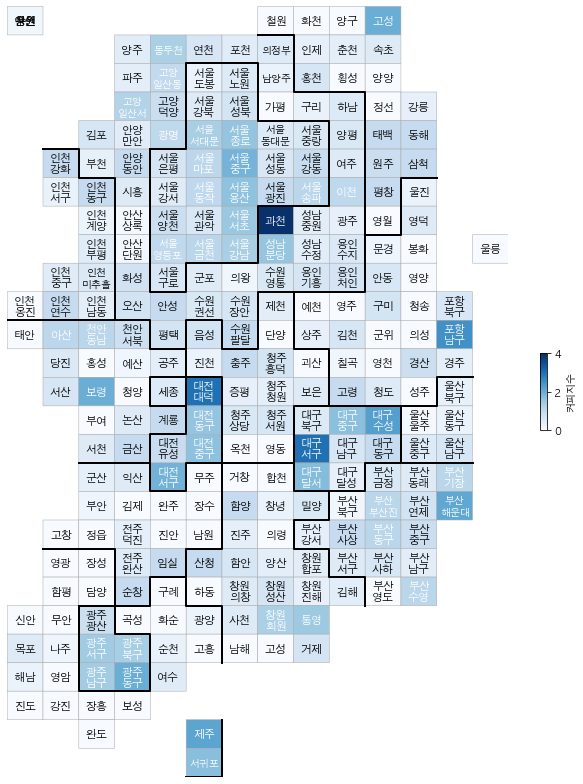

In [66]:
import catogram.drawKorea as dK
dK.drawKorea('커피지수', df_coffee, 'Blues')

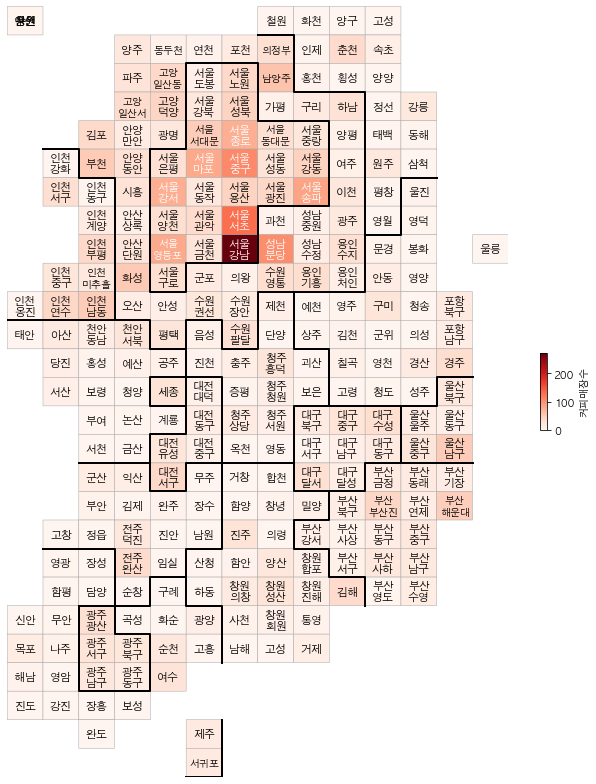

In [67]:
dK.drawKorea('커피매장수', df_coffee, 'Reds')

### 커피지수 순위

In [52]:
# 커피지수 Top10
df_coffee.sort_values(by='커피지수',ascending=False).head(10)

,ID,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수,커피지수,y,x,커피매장수
11,과천,4.0,0.0,1.0,0.0,4.000000,7.0,7.0,5.0
36,대구 서구,3.0,0.0,1.0,0.0,3.000000,15.0,8.0,4.0
39,대전 대덕,6.0,0.0,2.0,0.0,3.000000,13.0,5.0,8.0
183,포항 남구,10.0,0.0,4.0,0.0,2.500000,11.0,12.0,14.0
37,대구 수성,23.0,2.0,9.0,2.0,2.272727,14.0,10.0,36.0
155,제주,13.0,0.0,6.0,0.0,2.166667,25.0,5.0,19.0
65,부산 해운대,29.0,5.0,11.0,5.0,2.125000,17.0,12.0,50.0
49,보령,2.0,0.0,1.0,0.0,2.000000,13.0,2.0,3.0
6,고성(강원),2.0,0.0,1.0,0.0,2.000000,0.0,10.0,3.0
17,광주 동구,9.0,1.0,4.0,1.0,2.000000,23.0,3.0,15.0


In [53]:
# 커피매장수 Top10
df_coffee.sort_values(by='커피매장수',ascending=False).head(10)

,ID,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수,커피지수,y,x,커피매장수
73,서울 강남,87.0,69.0,47.0,69.0,1.344828,8.0,6.0,272.0
87,서울 서초,49.0,31.0,21.0,31.0,1.538462,7.0,6.0,132.0
96,서울 중구,57.0,15.0,23.0,15.0,1.894737,5.0,6.0,110.0
99,성남 분당,48.0,17.0,24.0,17.0,1.585366,8.0,7.0,106.0
90,서울 송파,34.0,13.0,28.0,13.0,1.146341,6.0,8.0,88.0
85,서울 마포,33.0,11.0,28.0,11.0,1.128205,5.0,5.0,83.0
92,서울 영등포,30.0,13.0,27.0,13.0,1.075000,8.0,4.0,83.0
76,서울 강서,19.0,6.0,47.0,6.0,0.471698,6.0,4.0,78.0
95,서울 종로,33.0,15.0,15.0,15.0,1.600000,4.0,6.0,78.0
28,남양주,12.0,1.0,46.0,1.0,0.276596,2.0,7.0,60.0


### Folium 지도로 커피지수 표시

In [54]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [55]:
df_folium = df_coffee.set_index('ID')

In [59]:
import catogram.foliumKorea as fK
fK.foliumKorea(df_folium,'커피지수','전국 커피지수 지도')